<a href="https://colab.research.google.com/github/sebasrosalesr/Sample-projects/blob/main/Foodvision_Fine_tuning_TensorFlow_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transferring Learninfg part II (Fine tuning)

**Creating helper function**

Task create your own helper function for later


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-27 14:23:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-27 14:23:14 (133 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# use the import function
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data, walk_through_dir

In [ ]:
import tensorflow as tf

# Check if a GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available")
else:
    print("GPU is not available")


GPU is available


## Pre trained models

I'm not sure if the Keras model will work for this application since they moved they entire library to Kaggle but let's try the code

tf.keras.application

In [ ]:
# Get 10% of training data of 10 classes of Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the data
unzip_data("10_food_classes_10_percent.zip")

--2024-07-27 14:23:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.2MB/s    in 8.6s    

2024-07-27 14:23:27 (18.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test

In [ ]:
#Creating training and test directing path
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"


In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print("Training data")
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                image_size=IMG_SIZE,
                                                                                label_mode="categorical",
                                                                                batch_size = BATCH_SIZE)
print('Test data')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size = BATCH_SIZE)

Training data
Found 750 files belonging to 10 classes.
Test data
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
#checking class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# see an example of batch data set
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.52729599e+02 9.17295914e+01 7.07295914e+01]
   [1.49591827e+02 8.85918350e+01 6.75918350e+01]
   [1.51071426e+02 9.00714264e+01 6.90714264e+01]
   ...
   [1.77040749e+01 2.07040749e+01 2.57040749e+01]
   [1.42142725e+01 1.82397881e+01 1.90203590e+01]
   [1.32551270e+01 1.82551270e+01 1.35407715e+01]]

  [[1.54214279e+02 9.22142868e+01 6.92142868e+01]
   [1.51081635e+02 8.90816269e+01 6.60816269e+01]
   [1.53000000e+02 9.10000000e+01 6.80000000e+01]
   ...
   [2.97142658e+01 3.47142639e+01 3.87142639e+01]
   [2.92142620e+01 3.43520279e+01 3.69285202e+01]
   [2.24539814e+01 2.84539814e+01 2.56477947e+01]]

  [[1.55647964e+02 9.04336700e+01 6.84336700e+01]
   [1.57658173e+02 9.24438782e+01 7.04438782e+01]
   [1.55617355e+02 9.04030609e+01 6.84030609e+01]
   ...
   [3.51173439e+01 4.35459137e+01 4.62857132e+01]
   [3.33418198e+01 4.17703934e+01 4.37703934e+01]
   [2.93622189e+01 3.80714302e+01 3.91529732e+01]]

  ...

  [[2.28000000e+02 1.92000000e+02 1.58561234e+02]
   [2

In [ ]:
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
    import datetime
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback


In [ ]:
# Model 0: Building a pre train model straight from keras API
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# freeze the layer in base model(so the underlying patterns aren't updated during training)
base_model.trainable = False

# Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

#if you are using resNet50 you need to normalize(this is an optinal step)(for efficientNet you don't have to they have a built in re-scale)
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# Pass the inputs to the model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after Global Average Pooling: {x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

#combine de inputs and outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

#compile the mode
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_0 = model_0.fit(train_data_10_percent,
            epochs=5,
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfering_learning",
                                                    experiment_name="10_percent_feature_extraction")])


Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after Global Average Pooling: (None, 1280)
Saving TensorBoard log files to: transfering_learning/10_percent_feature_extraction/20240727-143638
Epoch 1/5
24/24 [==============================] - 11s 164ms/step - loss: 1.9294 - accuracy: 0.4093 - val_loss: 1.3573 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 2s 97ms/step - loss: 1.1674 - accuracy: 0.7333 - val_loss: 0.8899 - val_accuracy: 0.8174
Epoch 3/5
24/24 [==============================] - 2s 97ms/step - loss: 0.8655 - accuracy: 0.8040 - val_loss: 0.7071 - val_accuracy: 0.8454
Epoch 4/5
24/24 [==============================] - 2s 99ms/step - loss: 0.7056 - accuracy: 0.8440 - val_loss: 0.6213 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 2s 97ms/step - loss: 0.6082 - accuracy: 0.8733 - val_loss: 0.5691 - val_accuracy: 0.8602


In [ ]:
model_0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
________________

In [ ]:
# Print debug information
print("History object:", history_0)

History object: <keras.src.callbacks.History object at 0x79db88eb6a10>


In [ ]:
import matplotlib.pyplot as plt

# SAVE THIS plot_loss_accuracy for later to have in the tools :)
def plot_loss_accuracy(history):
    # Get training and validation loss histories
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get training and validation accuracy histories
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create epochs array
    epochs = range(len(loss))

    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

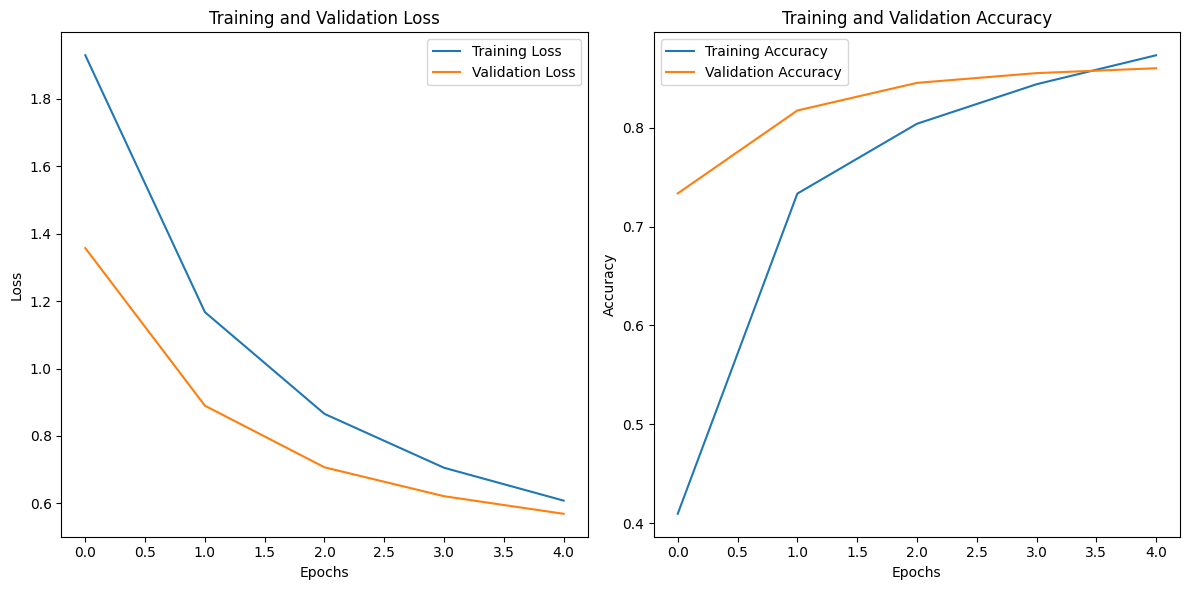

In [ ]:
# Assuming you have already trained your model and have the history
plot_loss_accuracy(history_0)

## Runing a series of experiments in transefering learning

We've seen how well transferring learing does with 10% of the data, let's try how does it perform with 1% of the training data

	1.	model_1 - use feature extraction transfer learning with 1% of the training data with data augmentation
	2.	model_2 - use feature extraction transfer learning with 10% of the training data with data augmentation
	3.	model_3 - use fine-tuning transfer learning on 10% of the training data with data augmentation
	4.	model_4 - use fine-tuning transfer learning on 100% of the training data with data augmentation

	🗝 Note: throughout all experiments the same test dataset will be used to evaluate our model… this ensures consistency across evaluation metrics.

##MODEL_1


In [ ]:
#Importing helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-27 15:43:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-27 15:43:17 (67.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# use the import function
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data, walk_through_dir

In [ ]:
# download 1% of the data file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

# Unzip the data
unzip_data("10_food_classes_1_percent.zip")


--2024-07-27 15:43:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.207, 173.194.210.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   209MB/s    in 0.6s    

2024-07-27 15:43:42 (209 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
# creating training and test dir
train_dir = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
# how many images are we working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [ ]:
import tensorflow as tf
#Set up data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print("Training data")
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                image_size=IMG_SIZE,
                                                                                label_mode="categorical",
                                                                                batch_size = BATCH_SIZE)

print('Test data')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size = BATCH_SIZE)


Training data
Found 70 files belonging to 10 classes.
Test data
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomWidth, RandomHeight
# Define data augmentation
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomWidth(0.2),
    RandomHeight(0.2),
])


##Visualize augmented data

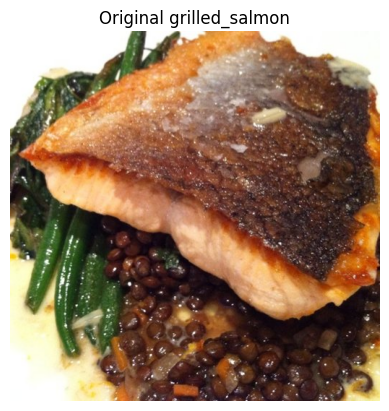

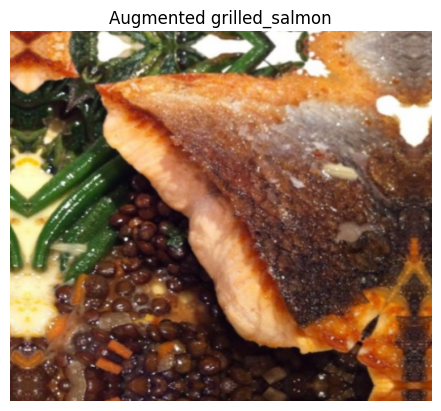

In [ ]:
#View a randome image and compare it to the augemented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

#choose a random image from the training dataset
target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
img_path = os.path.join(target_dir, random.choice(os.listdir(target_dir)))
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title(f"Original {target_class}")
plt.axis(False);


#Plot augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(augmented_img[0].numpy().astype(int))
plt.title(f"Augmented {target_class}")
plt.axis(False);

##Model_1: Feature extracion transfer learning with 1% of the data

In [ ]:
#Setup input shape
INPUT_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#Create input layer
inputs = tf.keras.layers.Input(shape=INPUT_SHAPE, name="input_layer")

#Add in data augmentation
x = data_augmentation(inputs)

#Pass the inputs to the model
x = base_model(x, training=False)

#Pool output features
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avarega_pooling')(x)

#Add output layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

#Create model
model_1 = tf.keras.Model(inputs, outputs)

#Compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data_1_percent,
            epochs=5,
            steps_per_epoch=len(train_data_1_percent),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfering_learning",
                                                    experiment_name="1_percent_feature_extraction")])


Saving TensorBoard log files to: transfering_learning/1_percent_feature_extraction/20240727-154843
Epoch 1/5
3/3 [==============================] - 100s 44s/step - loss: 2.2188 - accuracy: 0.1429 - val_loss: 2.1495 - val_accuracy: 0.2220
Epoch 2/5
3/3 [==============================] - 53s 25s/step - loss: 1.9938 - accuracy: 0.3143 - val_loss: 2.0190 - val_accuracy: 0.3240
Epoch 3/5
3/3 [==============================] - 52s 25s/step - loss: 1.7489 - accuracy: 0.5714 - val_loss: 1.9154 - val_accuracy: 0.3865
Epoch 4/5
3/3 [==============================] - 86s 42s/step - loss: 1.6392 - accuracy: 0.6286 - val_loss: 1.8134 - val_accuracy: 0.4622
Epoch 5/5
3/3 [==============================] - 88s 42s/step - loss: 1.4994 - accuracy: 0.6714 - val_loss: 1.7176 - val_accuracy: 0.5280


In [ ]:
#Check out model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avarega_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (5

In [ ]:
results_1_percent_data_augmented = model_1.evaluate(test_data)

79/79 [==============================] - 201s 3s/step - loss: 1.7216 - accuracy: 0.5216


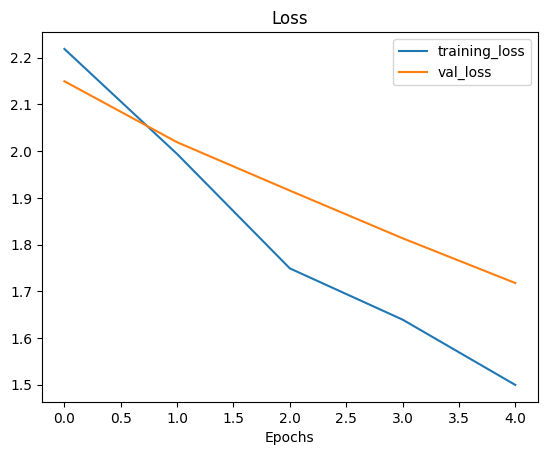

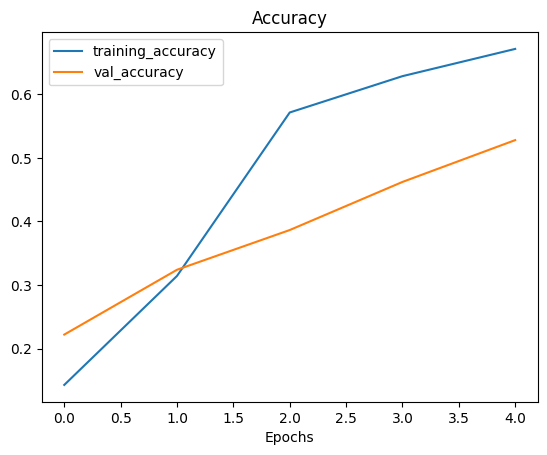

In [ ]:
plot_loss_curves(history_1)

##Model_2

Is model 0 but with data augementation, working with the 10% of the train data

In [ ]:
#Importing helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-07-27 16:22:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-27 16:22:06 (32.7 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Get 10% of training data of 10 classes of Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-07-27 16:24:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 74.125.141.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   127MB/s    in 1.3s    

2024-07-27 16:24:28 (127 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# use the import function
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys, unzip_data, walk_through_dir

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
#def directory paths
train_dir_10_percent = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [ ]:
# set data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print("Training data")
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                                image_size=IMG_SIZE,
                                                                                label_mode="categorical",
                                                                                batch_size = BATCH_SIZE)
print('Test data')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size = BATCH_SIZE)


Training data
Found 750 files belonging to 10 classes.
Test data
Found 2500 files belonging to 10 classes.


In [ ]:
# Create model 2 with data augmentation built in
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomWidth, RandomHeight

#data augmentation layer
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomWidth(0.2),
    RandomHeight(0.2),
    ],name="data_augmentation")



In [ ]:
#setting up input shape
input_shape = (224, 224,3)

#create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

#add in data augmentation
x = data_augmentation(inputs)

#pass the inputs to the model
x = base_model(x, training=False)

#pool the outputs
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)

#add output layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

#create model
model_2 = tf.keras.Model(inputs, outputs)

#compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



## CREATING A CHECKPOINT CALLBACK

In [ ]:
#Create a checkpoint callback
checkpoint_path = "model_checkpoint/10_percent_data_checkpoint.ckpt"

#Create a model checkpoint call back that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                          save_weights_only=True,
                                                          save_best_only=False,
                                                          save_freq = 'epoch',
                                                          verbose=1)

In [ ]:
## Fit the model 2 saving checkpoints every epoch
initial_epochs = 5

#Fit the model
history_2 = model_2.fit(train_data_10_percent,
            epochs=initial_epochs,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfering_learning",
                                                    experiment_name="10_percent"),
                                                      checkpoint_callback])

Saving TensorBoard log files to: transfering_learning/10_percent/20240727-213924
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9192 - accuracy: 0.4027
Epoch 1: saving model to model_checkpoint/10_percent_data_checkpoint.ckpt
24/24 [==============================] - 116s 5s/step - loss: 1.9192 - accuracy: 0.4027 - val_loss: 1.3445 - val_accuracy: 0.7171
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2571 - accuracy: 0.6973
Epoch 2: saving model to model_checkpoint/10_percent_data_checkpoint.ckpt
24/24 [==============================] - 138s 6s/step - loss: 1.2571 - accuracy: 0.6973 - val_loss: 0.9487 - val_accuracy: 0.7911
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9710 - accuracy: 0.7720
Epoch 3: saving model to model_checkpoint/10_percent_data_checkpoint.ckpt
24/24 [==============================] - 100s 4s/step - loss: 0.9710 - accuracy: 0.7720 - val_loss: 0.7812 - val_accuracy: 0.8257
Epoch 4/5
24/24 [===========

In [ ]:
#evaluate the model
testing_model_2=model_2.evaluate(test_data)

79/79 [==============================] - 187s 2s/step - loss: 0.6053 - accuracy: 0.8500


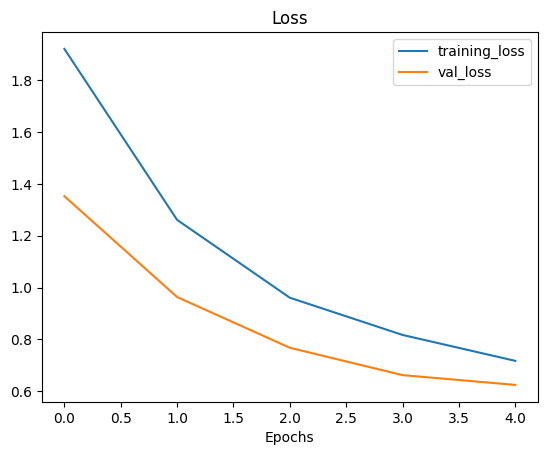

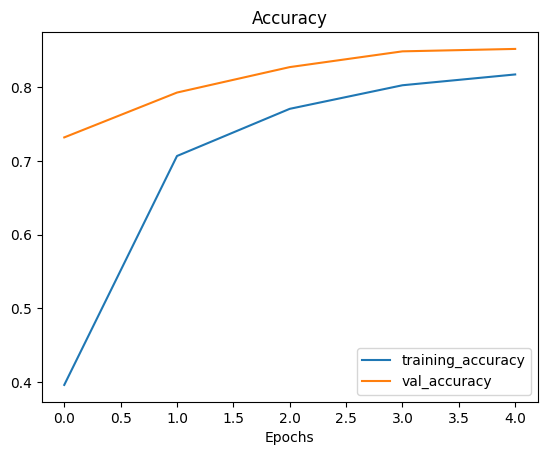

In [ ]:
plot_loss_curves(history_2)

In [ ]:
#loading in checkpointed wieghts
model_2.load_weights(checkpoint_path)

ValueError: Received incompatible tensor with shape (1280, 10) when attempting to restore variable with shape (1, 1, 1152, 48) and name Adam/m/block7a_se_reduce/kernel:0.

In [ ]:
#Ealuate model 2 with loaded weights
loaded_weights_eval = model_2.evaluate(test_data)

79/79 [==============================] - 185s 2s/step - loss: 0.6198 - accuracy: 0.8500


In [ ]:
loaded_weights_eval == testing_model_2

False

In [ ]:
#since the computer storage numbers are not going to be exactly as it is the only way is to check if they are close values
import numpy as np
np.isclose(testing_model_2, loaded_weights_eval, atol=0.001)

array([ True,  True])

## MODEL_3

**fine tuning** working with the 10% of the training data

Fine-tuning a Pre-trained Model: An Enhanced Explanation

Note: Fine-tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data.

Why Fine-tuning Works Best After Feature Extraction

	1.	Initial Training with Feature Extraction:
	•	Stabilizes the Network: By initially training only the top layers (feature extraction), you allow the network to stabilize and adapt to the new data without disrupting the pre-trained weights significantly.
	•	Leverages Pre-trained Knowledge: The initial training phase uses the powerful features learned from the vast dataset (like ImageNet) on which the model was pre-trained. This phase effectively transfers this knowledge to your specific task.
	•	Reduces Overfitting: By freezing the base layers initially, you reduce the risk of overfitting, especially when you have a small dataset. The model focuses on learning the specifics of your data without altering the general patterns captured by the base layers.
	2.	Transition to Fine-tuning:
	•	Gradual Unfreezing: After the initial training phase, you can gradually unfreeze some of the deeper layers. This allows the model to fine-tune the features at a lower level, making the model more specific to your task.
	•	Increased Adaptability: By fine-tuning, the model can adapt more deeply to the nuances of your custom data, potentially leading to better performance.
	•	Balanced Learning: This process balances learning specific features from your dataset with the generalized features learned from the larger pre-trained dataset.
	3.	Practical Steps for Fine-tuning:
	•	Train the Top Layers: Start by freezing the base layers and training the top layers (added layers) for a few epochs. This stabilizes the newly added layers and aligns them with the existing feature maps.
	•	Gradually Unfreeze Layers: Once the top layers are well-trained, gradually unfreeze a few of the deeper layers. Use a lower learning rate to avoid drastic changes to the pre-trained weights.
	•	Monitor Performance: Continuously monitor the model’s performance on a validation set. Fine-tune the learning rate and the number of layers to unfreeze based on validation performance.


In [ ]:
#see the layer in model 2
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7f1eb42dc760> True
<keras.src.engine.sequential.Sequential object at 0x7f1eb4157100> True
<keras.src.engine.functional.Functional object at 0x7f1eb1fffb80> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f1ec82b65c0> True
<keras.src.layers.core.dense.Dense object at 0x7f1eb21bfc70> True


In [ ]:
#what layer are in our base model (EfficientNetB0)
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# How many trainbale variables are in our base model?
print(len(base_model.trainable_variables))

0


In [ ]:
#To bergin fine-tuning
base_model.trainable = True

#Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Recompile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


**when fine tuning** UMLFIT paper
try to lower the learning rate by 10.

In [ ]:
#check with later are tunable
for  layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name ,layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
#Now we've unfrozen some of the layerlet's check how many trainable layer are
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model 2 with 10 more trainable layers
history_3 = model_2.fit(train_data_10_percent,
            epochs=fine_tune_epochs,
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            initial_epoch=history_2.epoch[-1],
            callbacks=[create_tensorboard_callback(dir_name="transfering_learning",
                                                    experiment_name="10_percent_fine_tuning")])


Saving TensorBoard log files to: transfering_learning/10_percent_fine_tuning/20240727-202857
Epoch 5/10
24/24 [==============================] - 129s 5s/step - loss: 0.6175 - accuracy: 0.8333 - val_loss: 0.4531 - val_accuracy: 0.8734
Epoch 6/10
24/24 [==============================] - 147s 6s/step - loss: 0.4867 - accuracy: 0.8680 - val_loss: 0.4031 - val_accuracy: 0.8799
Epoch 7/10
24/24 [==============================] - 109s 5s/step - loss: 0.4172 - accuracy: 0.8893 - val_loss: 0.3978 - val_accuracy: 0.8799
Epoch 8/10
24/24 [==============================] - 146s 6s/step - loss: 0.3756 - accuracy: 0.8880 - val_loss: 0.4015 - val_accuracy: 0.8701
Epoch 9/10
24/24 [==============================] - 108s 4s/step - loss: 0.3399 - accuracy: 0.8960 - val_loss: 0.3579 - val_accuracy: 0.8865
Epoch 10/10
24/24 [==============================] - 146s 6s/step - loss: 0.3111 - accuracy: 0.9147 - val_loss: 0.3338 - val_accuracy: 0.8931


In [ ]:
#Evaluat the model with fine tuning results
model_3_evaluation = model_2.evaluate(test_data)

79/79 [==============================] - 183s 2s/step - loss: 0.4202 - accuracy: 0.8616


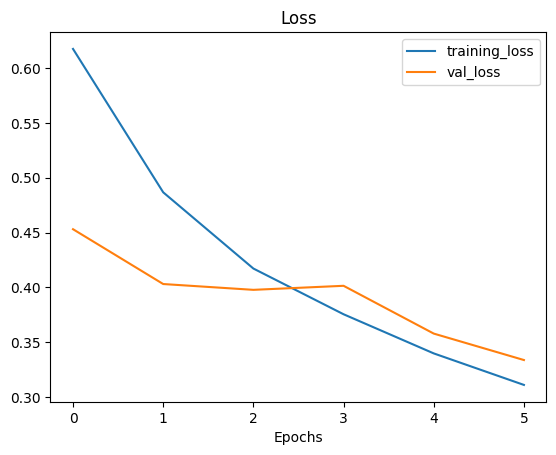

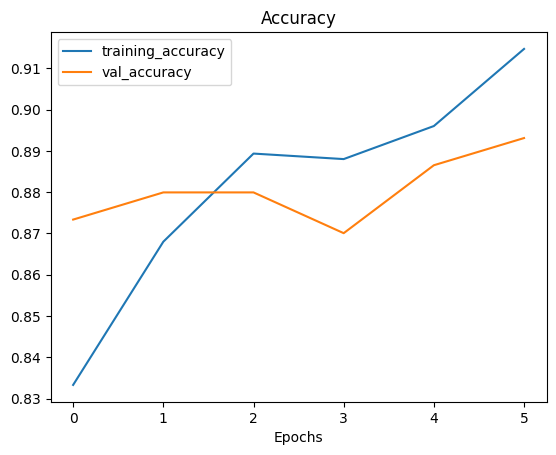

In [ ]:
#check out the loss curves of the fine tuned model
plot_loss_curves(history_3)

**Create function to plot loss curves before and after fine tuning**

In [ ]:
#let's create a function for ploting loss curve before fine tuning and after
def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares two TensorFlow model History objects.

  Args:
    original_history: History object from original model (before fine-tuning).
    new_history: History object from model fine-tuned with new

    initial_epochs: Number of epochs in original_history (new_history
    starts where original_history ends at)

  """
  #get original history
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  #combine original history with the new history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  #make plots for accuracy
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  #make plots for loss
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')


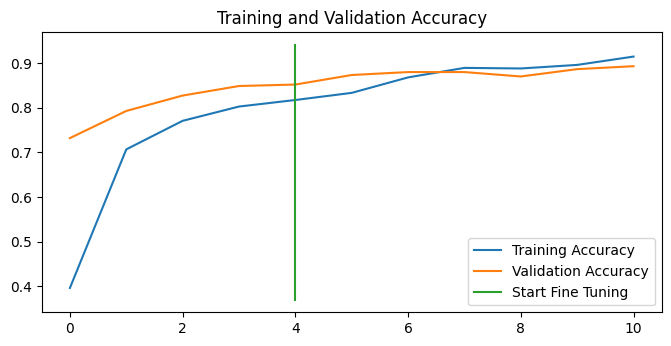

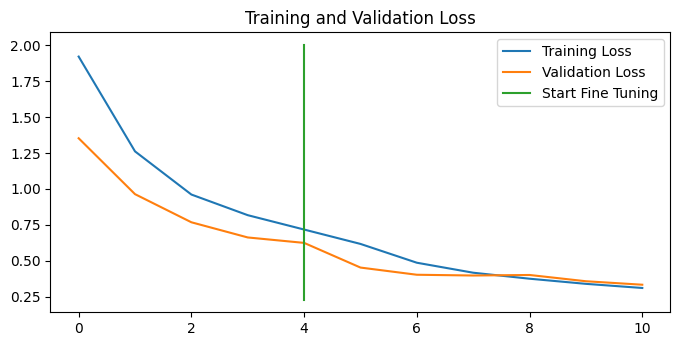

In [ ]:
compare_historys(history_2, history_3)


## Model_4 fine tuning with 100% of the data

In [ ]:
# download 100% of the data 101 Food Classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")

--2024-07-27 21:10:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  73.0MB/s    in 9.6s    

2024-07-27 21:10:40 (51.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# setup dir
train_dir_all_data = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#Walk thru dir
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [ ]:
# set up inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print("Training data all images")
train_data_all_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                image_size=IMG_SIZE,
                                                                                label_mode="categorical")
print('Test data')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical")


Training data all images
Found 7500 files belonging to 10 classes.
Test data
Found 2500 files belonging to 10 classes.


##Verifying Consistency of the Test Dataset

The test dataset we’ve loaded in is the same as what we’ve been using for previous experiments (all experiments have used the same test dataset).

Let’s verify this…

In [ ]:
# evaluate model 2 (fine tuned with 10% percent of the data)
model_2.evaluate(test_data)

79/79 [==============================] - 193s 2s/step - loss: 0.4202 - accuracy: 0.8616


[0.42015141248703003, 0.8615999817848206]

In [ ]:
model_3_evaluation

[0.42015135288238525, 0.8615999817848206]

To train a fine-tuning (model_4) we need to rever model_2 back to its feaature extraction weights.

In [ ]:
#load wieghts from the chekpoint, that way we can fine tune from
#the same stage the 10 percent data model was fine-tuned from
model_2.load_weights(checkpoint_path)
#note it didn't work need to find out how it works now

In [ ]:
model_2

In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
#To bergin fine-tuning
base_model.trainable = True

#Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#Recompile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])


In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model 2 with 10 more trainable layers
history_4 = model_2.fit(train_data_all_data,
            epochs=fine_tune_epochs,
            validation_data=test_data,
            validation_steps=int(0.25 * len(test_data)),
            initial_epoch=history_2.epoch[-1],
            callbacks=[create_tensorboard_callback(dir_name="transfering_learning",
                                                    experiment_name="full_data_percent_fine_tuning")])

Saving TensorBoard log files to: transfering_learning/full_data_percent_fine_tuning/20240727-220228
Epoch 5/10
235/235 [==============================] - 821s 3s/step - loss: 0.6476 - accuracy: 0.7916 - val_loss: 0.3864 - val_accuracy: 0.8799
Epoch 6/10
235/235 [==============================] - 741s 3s/step - loss: 0.5148 - accuracy: 0.8320 - val_loss: 0.2927 - val_accuracy: 0.9046
Epoch 7/10
235/235 [==============================] - 676s 3s/step - loss: 0.4556 - accuracy: 0.8489 - val_loss: 0.3598 - val_accuracy: 0.8997
Epoch 8/10
235/235 [==============================] - 707s 3s/step - loss: 0.4075 - accuracy: 0.8716 - val_loss: 0.3318 - val_accuracy: 0.9095
Epoch 9/10
235/235 [==============================] - 756s 3s/step - loss: 0.3829 - accuracy: 0.8768 - val_loss: 0.2941 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - ETA: 0s - loss: 0.3459 - accuracy: 0.8876

In [ ]:
model_4_evaluation = model_2.evaluate(test_data)

79/79 [==============================] - 185s 2s/step - loss: 0.2833 - accuracy: 0.9100


In [ ]:
#save model
model_2.save("/content/drive/MyDrive/Deep Learning Projects/s_projects/model_101food_tuned_with_all_data.h5")

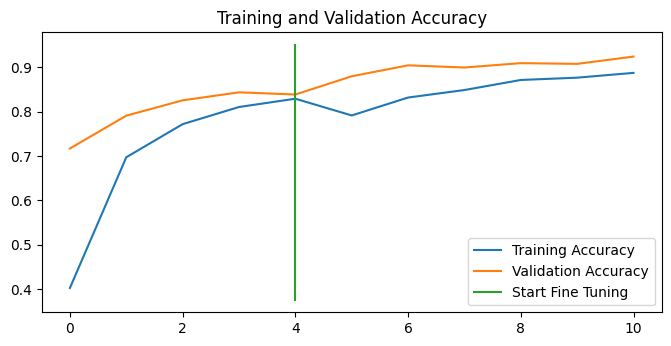

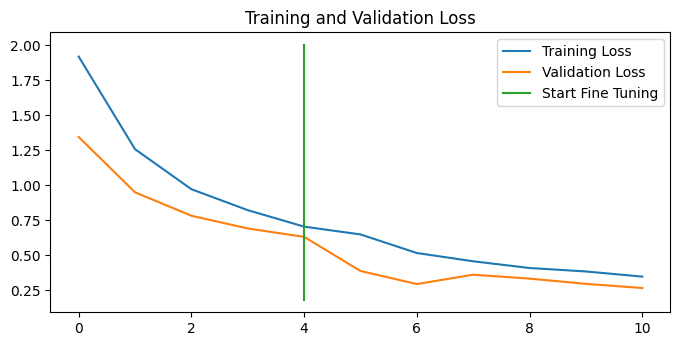

In [ ]:
compare_historys(history_2, history_4)